# Семинар 4

# Линейная классификация

Задача классификации заключается в том, чтобы отнести каждый из объектов выборки к какому-либо классу из данного набора. Более формально, нам нужно построить классификатор - функцию $a \colon X \rightarrow Y$, которая поставит в соответствие каждому объекту $x$ из пространства объектов $X$ какой-либо класс $y$ из пространства ответов $Y$, где в случае $Y$ - это какое-то конечное множество. То есть, если мы рассмотрим какой-то объект выборки $x$, мы должны получить для него ответ $y = a(x)$.

Задачи классификации можно поделить на два типа: бинарная классификация и многоклассовая классификация. В задаче бинарной классификации у нас всего лишь два класса, и множество $Y$ содержит всего два элемента. В задаче же многоклассовой классификации классов больше, чем два.

Примеры задач бинарной классификации:

- пассажиры с Титаника: выжил ли пассажир? (множество $X$ - пассажиры, множество $Y$ - выжил/нет)
- отдаст ли клиент кредит банку? (множество $X$ - клиенты, множество $Y$ - отдаст/нет)
- является ли отзыв к товару положительным? (множество $X$ - отзывы, множество $Y$ - положительный/отрицательный)

Примеры задач многоклассовой классификации:

- какое заболевание у пациента? (множество $X$ - пациенты, множество $Y$ - возможные заболевания)
- автоматическое распознавание символов в рукописном тексте (множество $X$ - выделенные в тексте символы, множество $Y$ - словарь символов)
- к какому жанру относится данный художественный текст? (множество $X$ - тексты, множество $Y$ - жанры)

Для того, чтобы познакомиться с задачей классификации на практике, сгенерируем искусственный датасет, состоящий из 500 объектов. Признаков будет два. Целевая переменная принимает два значения: $-1$ и $1$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
np.random.seed(13)

n = 500
X = np.random.normal(size=(n, 2))
X[:250, :] += 0.75
X[250:, :] -= 1
y = np.array([1] * 250 + [-1] * 250)

Визуализируем данные. Построим диаграмму рассеяния по данным признакам, и обозначим объекты разных классов разными цветами.

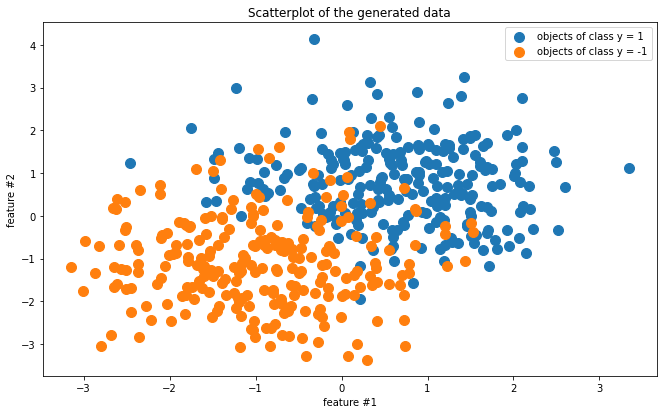

In [3]:
plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects of class y = -1')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

Перед нами стоит задача - разделить объекты на два класса. На картинке видно, что представители этих классов более-менее отделены друг от друга, и почти не перемешиваются. Но как же решить задачу с помощью машинного обучения? Напомним, что задача заключается в построении алгоритма (функции $a(x)$), который позволит классифицировать **любой** объект из пространства возможных объектов.

Есть различные типы моделей машинного обучения, которые позволяют решить данную задачу. Одним из типов моделей являются линейные классификаторы. Их особенность заключается в том, что решение о принадлежности объекта к какому-либо классу принимается на основе **линейной комбинации** его характеристик (значений признаков). Предположим, что в датасете $d$ признаков, то есть каждый объект $x$ имеет $d$ характеристик - $x_1, x_2, \ldots, x_d$. Тогда ответ линейного классификатора будет получаться по следующей формуле:

$$
y = f\left(\sum\limits_{j = 1}^d w_jx_j\right), \qquad\qquad (1)
$$

где $f$ - какая-то функция, подходящая по смыслу нашей задаче (выдающая конечное множество значений - классов), а $w_j$ - веса классификатора. Понятно, что так как мы можем выбрать любую разумную $f$, мы можем "сдвинуть" параметр функции $f$ на некоторое число $w_0$. Тогда можно переписать формулу $(1)$ следующим образом, добавив еще один вес - $w_0$:

$$
y = f\left(w_0 + \sum\limits_{j = 1}^d w_jx_j\right) \qquad\qquad (2)
$$

Какую же функцию $f$ мы можем выбрать? В задаче бинарной классификации $f$ может быть функцией, которая выдает разные ответы в зависимости от того, какой знак (плюс или минус) имеет рассматриваемое значение:

$$
y = \operatorname{sign}\left(w_0 + \sum\limits_{j = 1}^d w_jx_j\right) = \begin{cases} 1, & w_0 + \sum\limits_{j = 1}^d w_jx_j \geq 0 \\ -1, & w_0 + \sum\limits_{j = 1}^d w_jx_j < 0 \end{cases} \qquad\qquad (3)
$$

Кстати, если в качестве $f$ выбрать сигмоидную функцию, то получится логистическая регрессия, где на выходе получается вероятность положительного класса:

$$
y = \sigma\left(w_0 + \sum\limits_{j = 1}^d w_jx_j\right) = \frac{1}{1 + \exp\left(-w_0 - \sum\limits_{j = 1}^d w_jx_j\right)}
$$

Давайте более детально разберем, что мы получили. Приравняем рассматриваемое "сдвинутое" значение линейной комбинации к нулю:

$$
w_0 + \sum\limits_{j = 1}^d w_jx_j = 0 \qquad\qquad (4)
$$

Это очень похоже на уравнение прямой на плоскости, в котором также есть переменные ($x_1$ и $x_2$), веса ($a$ и $b$) и свободный коэффициент ($c$):

$$
ax_1 + bx_2 + c = 0
$$

Формула $(4)$ - это уравнение **гиперплоскости**, что является обобщением прямой на плоскости на пространства любых размерностей. Если говорить строго, прямая является подпространством размерности $1$ пространства размерности $2$ (плоскости), то есть ее размерность на $1$ меньше, чем у исходного пространства. А гиперплоскость - подпространство размерности $d - 1$ пространства размерности $d$.

Таким образом, уравнение $(4)$ соответствует гиперплоскости размерности $d - 1$ в пространстве размерности $d$. В таком случае уравнение $(3)$ показывает, **по какую сторону от гиперплоскости лежит объект**. Если объект лежит по одну сторону от гиперплоскости, то он относится к положительному классу, если по другую - к отрицательному. Получается, что данный классификатор строит **разделяющую гиперплоскость**, разделяющую пространство на две области - один класс и другой.

Для наглядности разберем случай $d = 2$ на примере сгенерированного ранее датасета. Уравнение разделяющей гиперплоскости (прямой) будет выглядеть так:

$$
w_0 + w_1x_1 + w_2x_2 = 0
$$

Зададим веса $w_0 = w_1 = w_2 = 1$ и посмотрим на прямую, которая получится в результате.

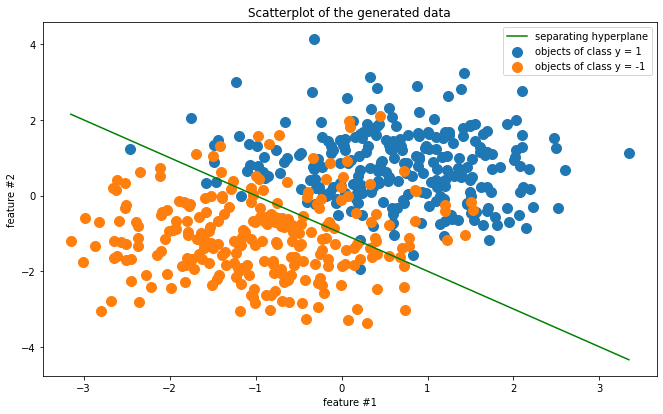

In [4]:
w0 = 1
w1 = 1
w2 = 1
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
x2 = (- w1 * x1 - w0) / w2

plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap='winter', s=100, label='objects of class y = 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], cmap='winter', s=100, label='objects of class y = -1')
plt.plot(x1, x2, color='green', label='separating hyperplane')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()


---
Добавим в данные единичный признак.

In [5]:
w_init = np.array([1.0, 1.0, 1.0])
X_new = np.c_[np.ones(n), X]
print(X_new)

[[ 1.          0.03760934  1.50376638]
 [ 1.          0.70549692  1.20181234]
 [ 1.          2.09510171  1.28233789]
 ...
 [ 1.         -1.03507109 -0.67849181]
 [ 1.         -1.1739724  -2.33492537]
 [ 1.         -2.51019432 -1.69927727]]


Видно, что прямая неплохо разделяет классы. Однако мы сделали только первое предположение о весах гиперплоскости, и оптимальное качество разбиения можно попробовать получить с помощью градиентного спуска. Для этого, как было сделано в лекции, можно выбрать логистическую функцию потерь:

$$
\tilde{Q}(w, X) = \frac{1}{\ell}\sum\limits_{i=1}^\ell\log\left(1 + \exp(-y_i\langle w, x_i\rangle)\right) \rightarrow \min_w
$$

Здесь $\ell$ - количество объектов в данных (в нашем случае $\ell = 500$), $w$ - вектор весов, $x_i$ - признаковое описание $i$-ого объекта. Для удобства мы предполагаем, что в данных есть единичный признак (который соответствует весу $w_0$), поэтому левая часть уравнения $(4)$ превращается в скалярное произведение:

$$
\langle w, x\rangle = 0
$$

Градиент выбранной функции потерь:

$$
\nabla_w\tilde{Q}(w, X) = -\frac{1}{\ell}\sum\limits_{i=1}^\ell\frac{y_ix_i}{1 + \exp(y_i\langle w, x_i\rangle)}
$$

Формула градиентного спуска:

$$
w^{(t)} = w^{(t - 1)} - \eta\nabla_w\tilde{Q}(w, X)
$$

**Задание:** Реализуйте формулы функции потерь и ее градиента

In [18]:
(X_new * y.reshape(-1,1))/((1+np.exp((X_new @w_init).reshape(-1,1))*y.reshape(-1,1)))

array([[ 0.07300801,  0.00274578,  0.109787  ],
       [ 0.05179342,  0.0365401 ,  0.06224597],
       [ 0.01240174,  0.0259829 ,  0.01590322],
       ...,
       [-1.96038316,  2.02913593,  1.33010391],
       [-1.08856318,  1.27794313,  2.54171377],
       [-1.04207692,  2.61581558,  1.77077763]])

In [78]:
def log_loss(w, X, y):
    return np.mean(np.log(1+np.exp( -(X @w)*y )))
    

def log_loss_grad(w, X, y):
    return -((X * y.reshape(-1,1))/((1+np.exp((X @w))*y)).reshape(-1,1)).mean(axis = 0)

Начальное значение функции потерь:

In [79]:
log_loss(w_init, X_new, y)

0.32611741088472

Начальное значение градиента функции потерь:

In [80]:
log_loss_grad(w_init, X_new, y)

array([ 1.71228537, -0.70393488, -1.96792222])

Обучим классификатор с помощью градиентного спуска.

In [81]:
def gradient_descent(X, y, w_init, n_steps, eta):
    w = w_init.copy()
    loss_array = [log_loss(w_init, X, y)]
    for _ in range(n_steps):
        w_grad = log_loss_grad(w, X, y)
        w -= eta * w_grad
        loss = log_loss(w, X, y)
        loss_array.append(loss)
    return w, loss_array

w, loss_array = gradient_descent(X_new, y, w_init, n_steps=1000, eta=0.1)
print('weights:', w)
print('loss value:', loss_array[-1])

weights: [-11.5621657   58.47110783  50.6264891 ]
loss value: 4.559795277446505


Нарисуем график падения значения функции потерь в зависимости от номера шага градиентного спуска.

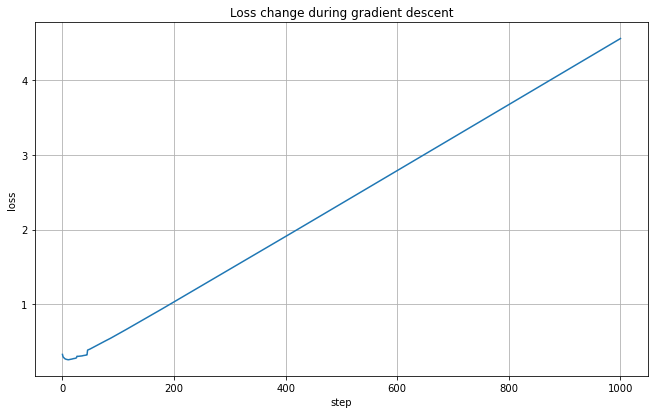

In [82]:
plt.figure(figsize=(11, 6.5))
plt.plot(loss_array)
plt.title('Loss change during gradient descent')
plt.xlabel('step')
plt.ylabel('loss')
plt.grid()
plt.show()

Визуализируем результат.

In [83]:
w

array([-11.5621657 ,  58.47110783,  50.6264891 ])

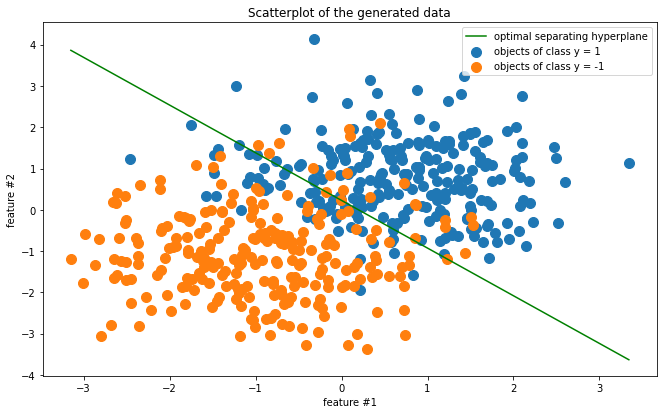

In [31]:
w0 = w[0]
w1 = w[1]
w2 = w[2]

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
x2 = (- w1 * x1 - w0) / w2

plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, label='objects of class y = 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], s=100, label='objects of class y = -1')
plt.plot(x1, x2, color='green', label='optimal separating hyperplane')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

В `sklearn` есть готовая реализация линейного классификатора, который можно обучить с помощью градиентного спуска.

In [38]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log', learning_rate='constant', eta0=0.1, random_state=13, verbose=1)
# заметьте - в данном случае добавлять единичный признак в датасет не нужно, потому что метод SGDClassifier создаст его сам
clf.fit(X, y)
y_pred_sgdclf = clf.predict(X)

-- Epoch 1
Norm: 2.24, NNZs: 2, Bias: 0.474114, T: 500, Avg. loss: 0.287484
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.46, NNZs: 2, Bias: 0.422915, T: 1000, Avg. loss: 0.262477
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.78, NNZs: 2, Bias: 0.645942, T: 1500, Avg. loss: 0.256615
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.72, NNZs: 2, Bias: 0.531834, T: 2000, Avg. loss: 0.264539
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.49, NNZs: 2, Bias: 0.176762, T: 2500, Avg. loss: 0.262683
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.58, NNZs: 2, Bias: 0.442014, T: 3000, Avg. loss: 0.262656
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.40, NNZs: 2, Bias: 0.283398, T: 3500, Avg. loss: 0.261008
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.53, NNZs: 2, Bias: 0.441976, T: 4000, Avg. loss: 0.262127
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds


Посмотрим на получившиеся веса при признаках и на свободный коэффициент:

In [35]:
clf.coef_, clf.intercept_

(array([[1.65426561, 1.90853885]]), array([0.44197613]))

Визуализируем результат.

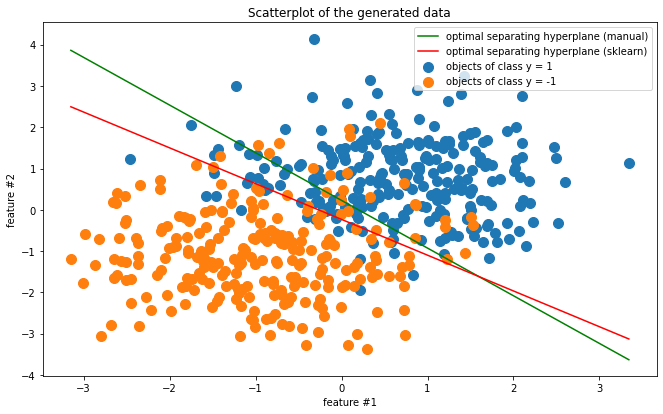

In [36]:
w0_clf = clf.intercept_.item()
w1_clf = clf.coef_[0][0]
w2_clf = clf.coef_[0][1]
x2_clf = (- w1_clf * x1 - w0_clf) / w2_clf

plt.figure(figsize=(11, 6.5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, label='objects of class y = 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], s=100, label='objects of class y = -1')
plt.plot(x1, x2, color='green', label='optimal separating hyperplane (manual)')
plt.plot(x1, x2_clf, color='red', label='optimal separating hyperplane (sklearn)')
plt.title('Scatterplot of the generated data')
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend()
plt.show()

# Метрики качества классификации

Итак, мы получили оптимальный результат с точки зрения градиентного спуска. Однако на данный момент мы измеряли качество по значению логистической функции потерь (чем меньше, тем лучше), которое неочень понятно, как интерпретировать. Можно ли рассмотреть что-то более интерпретируемое?

**Задание:** напишите функцию `predict_classes`, которая возвращает предсказание класса (`1` or `-1`) для каждого объекта из `X`

In [40]:
def predict_classes(X, w):
    return np.sign(X @ w)

y_pred = predict_classes(X_new, w)
y_pred[:6], y_pred[-6:]

(array([ 1.,  1.,  1.,  1.,  1., -1.]), array([ 1., -1., -1., -1., -1., -1.]))

### Доля правильных ответов (accuracy)

Доля правильных ответов - пожалуй, одна из самых тривиальных метрик. Она показывает долю верных предсказаний среди всех объектов:

$$
\text{accuracy}(a, X) = \frac{1}{\ell}\sum\limits_{i=1}^\ell [a(x_i) = y_i]
$$

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))

print(accuracy_score(y, y_pred_sgdclf))


0.858
0.906


Итак, алгоритм предсказывает верно 90.4% объектов. Для более детального анализа можно построить матрицу ошибок:

|           | y = 1               | y = -1              |
|-----------|---------------------|---------------------|
| a(x) = 1  | True Positive (TP)  | False Positive (FP) |
| a(x) = -1 | False Negative (FN) | True Negative (TN)  |

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[227,  23],
       [ 48, 202]], dtype=int64)

Итак, в данном примере алгоритм неправильно классифицирует 21 объект положительного класса и 27 объектов отрицательного класса.

Проблема метрики accuracy в том, что она не учитывает цену ошибки, и дает обманчивый результат в случае несбалансированной выборки, о чем рассказывалось в лекции. Следующие метрики позволяют акцентировать большее внимание на разные виды ошибок.

### Точность (precision)

Точность показывает долю верно предсказанных положительных объектов среди всех предсказаний положительного класса:

$$
\text{precision}(a, X) = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

In [45]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.8977777777777778

### Полнота (recall)

Полнота показывает долю верно предсказанных положительных объектов среди всех положительных объектов в данных:

$$
\text{recall}(a, X) = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

In [46]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.808

Точность и полнота в данном случае показывают похожий результат, потому что модель примерно одинаково ошибается в классификации объектов положительного и отрицательного классов. В реальных задачах можно максимизировать точность или полноту в зависимости от того, какой вид ошибок мы не хотим допускать. Однако обычно при максимизации одной из этих метрик значение другой ухудшается.

### F-мера (F-score)

F-мера - это метрика, находящая некоторый баланс между точностью и полнотой. Ее значение - это их гармоническое среднее:

$$
\text{F-score}(a, X) = 2\frac{\text{precision}(a, X)\cdot\text{recall}(a, X)}{\text{precision}(a, X) + \text{recall}(a, X)}
$$

In [47]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8505263157894737

In [48]:
# проверим, что формула выше дает такой же ответ
2 * precision_score(y, y_pred) * recall_score(y, y_pred) / (precision_score(y, y_pred) + recall_score(y, y_pred))

0.8505263157894737

Если какой-либо из метрик (точности или полноте) необходимо отдать приоритет, можно использовать взвешенную версию F-меры - с положительным параметром $\beta$:

$$
\text{F-score}_\beta(a, X) = (1 + \beta^2)\frac{\text{precision}(a, X)\cdot\text{recall}(a, X)}{\beta^2\text{precision}(a, X) + \text{recall}(a, X)}
$$

Если $0 < \beta < 1$, то нам важнее точность. Это легко проверить, устремив $\beta$ к $0$ - в таком случае в выражении выше останется лишь точность. Если $\beta > 1$, то нам важнее полнота - проверяется это аналогичным образом, устремлением $\beta$ к бесконечности.

In [50]:
from sklearn.metrics import fbeta_score
beta = 0.5
fbeta_score(y, y_pred, beta=beta)

0.8782608695652174

### PR-кривая и AUC-PRC

Вместо того, чтобы предсказывать один из классов в задаче классификации, можно предсказывать вероятность принадлежности одному из классов. А именно, построить алгоритм $b(x)$, который вместо чисел $1$ и $-1$ будет выдавать вещественное число от $0$ до $1$ - вероятность того, что объект принадлежит классу $1$. Скажем, если $b(x) = 0.98$, то можно заключить, что по мнению алгоритма объект $x$ принадлежит классу $1$ с вероятностью $98\%$. Для того, чтобы из предсказаний затем все же получить один из классов $1$ или $-1$, можно задать порог $t$ и использовать алгоритм $a(x) = [b(x) > t]$. Одной из таких моделей является, например, логистическая регрессия. 

**Задание:** напишите функцию `predict_probabilities`, которая возвращает вероятность принадлежности к классу `1` для каждого объекта из `X`

In [51]:
def predict_probabilities(X, w):
    prob = 1/(1+np.exp(-(X@ w)))
    return prob

y_pred_prob = predict_probabilities(X_new, w)
y_pred_prob[:6], y_pred_prob[-6:]

(array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 5.49490711e-18]),
 array([5.04265242e-001, 1.68431197e-046, 1.92383324e-066, 5.97702262e-047,
        6.75441861e-087, 7.47940931e-107]))

На выходе из `predict_probabilities` получается число от $0$ до $1$, и чтобы получить класс в качестве ответа, можно задать порог $t$ равный, к примеру, $0.5$.

**Задание:** напишите функцию `threshold`, которая возвращает вероятность предсказание класса (`1` or `-1`) используя вектор вероятностей и порог $t$

In [53]:
def threshold(y_pred_prob, t):
    y_pred_t = y_pred_prob.copy()
    y_pred_t[y_pred_t > t] =1
    y_pred_t[y_pred_t <= t] =-1

    return (y_pred_t)

t = 0.5
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.5
Precision: 0.8977777777777778
Recall: 0.808


In [56]:
t = 0.75
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.75
Precision: 0.9095022624434389
Recall: 0.804


In [57]:
t = 0.25
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

t = 0.25
Precision: 0.8977777777777778
Recall: 0.808


**Как выбрать порог?** Для ответа на этот вопрос, и в целом для более подробного анализа результатов классификации можно использовать PR-кривую, которая показывает взаимосвязь значения порога $t$ и значений точности и полноты. По оси $x$ отложим полноту, по оси $y$ - точность, и для каждого возможного значения порога (которых столько, сколько различных значений вероятностей для объектов в датасете выдал алгоритм) посчитаем значение точности и полноты и обозначим его на графике.

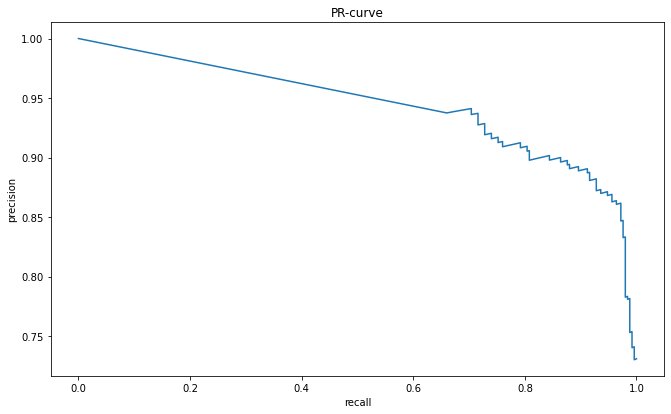

In [58]:
from sklearn.metrics import precision_recall_curve
precision_array, recall_array, thresholds = precision_recall_curve(y, y_pred_prob)
plt.figure(figsize=(11, 6.5))
plt.plot(recall_array, precision_array)
plt.title('PR-curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

Предположим, что нам необходимо получить точность не меньше $0.95$. Какой тогда нужно задать порог, чтобы значение полноты было оптимальным?

In [59]:
big_precision_idx = np.where(precision_array >= 0.95)[0]
big_precision_idx

array([165], dtype=int64)

In [60]:
recall_array[big_precision_idx]

array([0.])

In [61]:
big_precision_idx[np.argmax(recall_array[big_precision_idx])]

165

In [63]:
t = thresholds[186]
y_pred_t = threshold(y_pred_prob, t)
print('t =', t)
print('Precision:', precision_score(y, y_pred_t))
print('Recall:', recall_score(y, y_pred_t))

IndexError: index 165 is out of bounds for axis 0 with size 165

In [64]:
f1_score(y, y_pred_t)

0.8505263157894737

Площадь под PR-кривой (AUC-PRC) показывает, насколько хорошо классификатор отранжировал объекты.

In [65]:
from sklearn.metrics import auc
auc(recall_array, precision_array)

0.9434854303576387

### ROC-кривая и AUC-ROC

Проанализировать результаты классификации (насколько хорошо алгоритм отранжировал объекты, присвоив им вероятности) также можно с помощью ROC-кривой. Принцип ее построения такой же, как и в PR-кривой - меняя значение порога, считать значения по осям. Только в этом случае по оси $x$ отложен False Positive Rate, по оси $y$ - True Positive Rate (который имеет ту же формулу, что и полнота):

$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

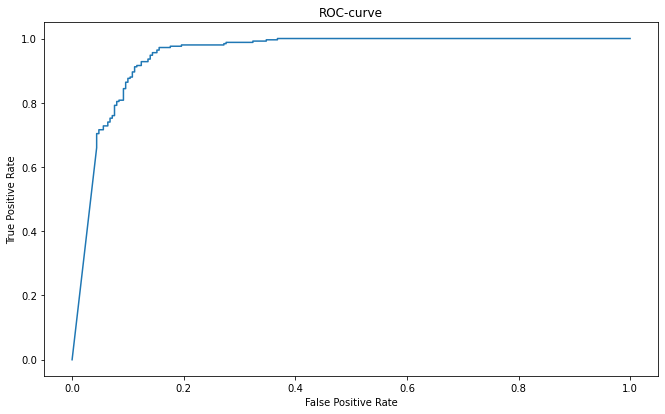

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure(figsize=(11, 6.5))
plt.plot(fpr, tpr)
plt.title('ROC-curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Площадь под ROC-кривой показывает вероятность того, что случайно выбранная пара объектов, где один из них относится к положительному классу, а другой - к отрицательному, окажется отранжированной правильно с точки зрения вероятностей (алгоритм выдаст бОльшую вероятность в случае объекта положительного класса).

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_pred_prob)

0.949864

Как и доля правильных ответов, метрика AUC-ROC может ввести в заблуждение в случае задачи с несбалансированными классами.